In [1]:
# !pip install datasets

In [2]:
import pickle
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# from datasets import load_dataset
# import spacy
# import re
# import nltk

In [4]:
# nltk.download('punkt')

In [5]:
# nlp = spacy.load("en_core_web_sm")

In [6]:
# def preprocess_tokenize_sentence(sentence):
#     if sentence == "":
#         return sentence
#     sentence = re.sub(r'\n', " ", sentence)
#     sentence = re.sub(r'(((http|https):\/\/)|www\.)([a-zA-Z0-9]+\.){0,2}[a-zA-Z0-9]+([a-zA-Z0-9\/#%&=\?_\.\-\+]+)', "", sentence)
#     sentence = re.sub(r'(@[a-zA-Z0-9_]+)', "", sentence)
#     sentence = re.sub(r'(#[a-zA-Z0-9_]+\b)', "", sentence)
#     sentence = re.sub(r'\d+', "", sentence)
#     sentence = re.sub(r'--', " ", sentence)
#     sentence = re.sub(r'[\_\$\*\^\(\)\[\]\{\}\=\+\<\>",\&\%\-\—\”\“\–\\\.\?\!;]', " ", sentence)
#     sentence = re.sub(r'&lt;[^&]*&gt;', '', sentence)
#     sentence = re.sub(r'——', "...", sentence)
#     sentence = re.sub(r'—-?', r", ", sentence)
#     sentence = re.sub(r'_', "", sentence)
#     sentence = re.sub(r'[“”]', "\"", sentence)
#     sentence = re.sub(r'[‘’]', "\'", sentence)
#     sentence = re.sub(r'[.,\'"!?()\[\]{}\-;:]+', "", sentence)
#     sentence = re.sub(r'/', " ", sentence)

#     sentence = sentence.lower()
#     sentence = nltk.word_tokenize(sentence)

#     pattern = re.compile(r'\b\w+\b')

#     sentence = [word for word in sentence if pattern.match(word)]

#     # pattern2 = r"/"

#     return sentence

In [7]:
# wiki_qa_dataset = load_dataset("wiki_qa")

In [8]:
# wiki_qa_dataset["train"][11]

In [9]:
# wiki_qa_set = {
#     "train" : {},
#     "validation" : {},
#     "test" : {}
# }

# for split in ["train", "validation", "test"]:
#     for example in wiki_qa_dataset[split]:
#         if example["question_id"] not in wiki_qa_set[split]:
#             wiki_qa_set[split][example["question_id"]] = {
#                 "question" : preprocess_tokenize_sentence(example["question"]),
#                 "answers" : [],
#                 "labels" : [],
#                 "sum_labels" : 0
#             }
#         wiki_qa_set[split][example["question_id"]]["answers"].append(preprocess_tokenize_sentence(example["answer"]))
#         wiki_qa_set[split][example["question_id"]]["labels"].append(example["label"])
#         wiki_qa_set[split][example["question_id"]]["sum_labels"] += example["label"]

# wiki_qa_train = [{"question" : wiki_qa_set["train"][qn]["question"],
#                   "answers" : wiki_qa_set["train"][qn]["answers"],
#                   "labels" : wiki_qa_set["train"][qn]["labels"]} for qn in wiki_qa_set["train"] if wiki_qa_set["train"][qn]["sum_labels"] > 0]

# wiki_qa_validation = [{"question" : wiki_qa_set["validation"][qn]["question"],
#                     "answers" : wiki_qa_set["validation"][qn]["answers"],
#                     "labels" : wiki_qa_set["validation"][qn]["labels"]} for qn in wiki_qa_set["validation"] if wiki_qa_set["validation"][qn]["sum_labels"] > 0]

# wiki_qa_test = [{"question" : wiki_qa_set["test"][qn]["question"],
#                 "answers" : wiki_qa_set["test"][qn]["answers"],
#                 "labels" : wiki_qa_set["test"][qn]["labels"]} for qn in wiki_qa_set["test"] if wiki_qa_set["test"][qn]["sum_labels"] > 0]

In [10]:
# for i in range(4):
#     print(wiki_qa_train[i])

In [11]:
# print(len(wiki_qa_train))

In [12]:
# with open("wiki_qa_train.pkl", "wb") as f:
#     pickle.dump(wiki_qa_train, f)

# with open("wiki_qa_validation.pkl", "wb") as f:
#     pickle.dump(wiki_qa_validation, f)

# with open("wiki_qa_test.pkl", "wb") as f:
#     pickle.dump(wiki_qa_test, f)

In [13]:
# loading the tokenized datasets
train = pickle.load(open('wiki_qa_train.pkl', 'rb'))
test = pickle.load(open('wiki_qa_test.pkl', 'rb'))
val = pickle.load(open('wiki_qa_validation.pkl', 'rb'))

In [14]:
test[0]

{'question': ['how',
  'african',
  'americans',
  'were',
  'immigrated',
  'to',
  'the',
  'us'],
 'answers': [['african',
   'immigration',
   'to',
   'the',
   'united',
   'states',
   'refers',
   'to',
   'immigrants',
   'to',
   'the',
   'united',
   'states',
   'who',
   'are',
   'or',
   'were',
   'nationals',
   'of',
   'africa'],
  ['the',
   'term',
   'african',
   'in',
   'the',
   'scope',
   'of',
   'this',
   'article',
   'refers',
   'to',
   'geographical',
   'or',
   'national',
   'origins',
   'rather',
   'than',
   'racial',
   'affiliation'],
  ['from',
   'the',
   'immigration',
   'and',
   'nationality',
   'act',
   'of',
   'to',
   'an',
   'estimated',
   'total',
   'of',
   'to',
   'million',
   'africans',
   'immigrated',
   'to',
   'the',
   'united',
   'states',
   'accounting',
   'for',
   'roughly',
   'of',
   'total',
   'immigration',
   'to',
   'the',
   'united',
   'states',
   'during',
   'this',
   'period'],
  ['afric

In [15]:
numberbatch_embeddings = pickle.load(open('/content/drive/MyDrive/numberbatch_embeddings.pkl', 'rb'))

In [16]:
wiki_qa_vocab = ["<PAD>", "<UNK>", "<S>", "</S>"]

def add_to_vocab(data, vocab):
    for datum in data:
        # datum is the key of the dictionary
        for words in datum["question"]:
            if words not in vocab:
                vocab.append(words)

        for answer in datum["answers"]:
            for words in answer:
                if words not in vocab:
                    vocab.append(words)
    return

In [17]:
add_to_vocab(train, wiki_qa_vocab)
add_to_vocab(test, wiki_qa_vocab)
add_to_vocab(val, wiki_qa_vocab)

In [18]:
print(len(wiki_qa_vocab))

22928


In [19]:
wiki_qa_vocab2id = {word: i for i, word in enumerate(wiki_qa_vocab)}

In [20]:
def get_missing_embedding(word, word_embeddings):
    possible_matches = []

    index = len(word) - 1

    while(index > 0):
        for known_word in word_embeddings.keys():
            if known_word.startswith(word[:index]):
                possible_matches.append(known_word)

        if possible_matches:
            avg_embedding = np.mean([word_embeddings[word] for word in possible_matches], axis=0)
            return avg_embedding

        index -= 1

    return None

In [21]:
wiki_qa_embeddings = []
index = 0
for i in tqdm(range(len(wiki_qa_vocab))):
   word = wiki_qa_vocab[i]
   if(word=="<PAD>"):
      wiki_qa_embeddings.append(torch.Tensor([0.0] * 300))
   elif(word=="<S>"):
      wiki_qa_embeddings.append(torch.Tensor([1.0] * 300))
   elif(word=="</S>"):
      wiki_qa_embeddings.append(torch.Tensor([-1.0] * 300))
   elif(word=="<UNK>"):
      wiki_qa_embeddings.append(torch.Tensor([0.0] * 300))
   else:
      if word in numberbatch_embeddings:
         wiki_qa_embeddings.append(torch.Tensor(numberbatch_embeddings[word]))
      else:
         if(get_missing_embedding(word, numberbatch_embeddings) is not None):
            wiki_qa_embeddings.append(torch.Tensor(get_missing_embedding(word, numberbatch_embeddings)))
         else:
            wiki_qa_embeddings.append(torch.Tensor([0.0] * 300))
   index += 1

100%|██████████| 22928/22928 [20:50<00:00, 18.34it/s]


In [22]:
# save the embeddings
pickle.dump(wiki_qa_embeddings, open('wiki_qa_embeddings.pkl', 'wb'))

# save the wiki_qa_vocab2id
pickle.dump(wiki_qa_vocab2id, open('wiki_qa_vocab2id.pkl', 'wb'))

In [23]:
# # load the embeddings
# wiki_qa_embeddings = pickle.load(open('wiki_qa_embeddings.pkl', 'rb'))

# # load the wiki_qa_vocab2id
# wiki_qa_vocab2id = pickle.load(open('wiki_qa_vocab2id.pkl', 'rb'))

In [24]:
def pad_sequence(data, min_length):
    for datum in data:
        if len(datum["question"]) < min_length:
            print("question", datum["question"])
            datum["question"] += ["<PAD>"] * (min_length - len(datum["question"]))

        for i in range(len(datum["answers"])):
            if len(datum["answers"][i]) < min_length:
                print("answer", datum["answers"][i])
                datum["answers"][i] += ["<PAD>"] * (min_length - len(datum["answers"][i]))
    return

pad_sequence(train, 5)
pad_sequence(test, 5)
pad_sequence(val, 5)

answer ['measuring', 'spoons']
answer ['viking', 'c', 'rocket', 'engine']
answer ['nassau']
answer ['freeport', 'bahamas']
answer ['ibid']
question ['what', 'continent', 'is', 'australia']
answer ['a', 'grab', 'dredge']
question ['what', 'area', 'code', 'is']
question ['what', 'does', 'arraignment', 'mean']
question ['what', 'did', 'chaucer', 'do']
question ['how', 'do', 'pineapples', 'grow']
answer ['url', 'http']
answer ['moroccan', 'wine', 'kasher', 'label']
answer ['districts', 'of', 'west', 'bengal']
answer ['typical', 'eukaryotic', 'cell']
question ['how', 'fire', 'extinguisher', 'works']
answer ['may']
question ['what', 'do', 'porcupines', 'eat']
answer ['effective', 'nuclear', 'charge', 'diagram']
question ['what', 'domain', 'is', 'eu']
question ['how', 'many', 'seasons', 'heroes']
answer ['infobox', 'holiday']
answer ['chinese', 'new', 'year']
answer ['february', 'vietnam']
answer ['a', 'modern', 'backpack']
answer ['swiss', 'army', 'backpack', 'ca']
answer ['integrated', 'bea

In [25]:
# getting the embeddings for the questions and candidate answers
def get_embeddings(data):
    new_data = []
    for datum in tqdm(data):
        new_datum = {}
        new_datum["question"] = []
        new_datum["answers"] = []
        for word in datum["question"]:
            new_datum["question"].append(wiki_qa_embeddings[wiki_qa_vocab2id[word]])
        for answer in datum["answers"]:
            new_datum["answers"].append([])
            for word in answer:
                new_datum["answers"][-1].append(wiki_qa_embeddings[wiki_qa_vocab2id[word]])
        new_datum["labels"] = datum["labels"]
        new_data.append(new_datum)
    return new_data

embed_train = get_embeddings(train)
embed_test = get_embeddings(test)
embed_val = get_embeddings(val)

100%|██████████| 126/126 [00:00<00:00, 12096.46it/s]


In [26]:
embed_test[0]["question"]

[tensor([-1.3980e-01, -1.1030e-01, -3.5900e-02,  1.8500e-02,  2.3000e-03,
          2.4700e-02,  6.3900e-02, -6.6400e-02,  1.6940e-01, -3.5200e-02,
         -3.7100e-02,  8.8200e-02, -8.8500e-02, -7.5500e-02,  9.3300e-02,
          4.9000e-02,  6.8200e-02,  8.3300e-02,  1.0400e-02,  7.2100e-02,
          3.2800e-02, -9.5000e-02,  1.0430e-01,  3.8900e-02,  9.5000e-03,
         -6.8100e-02,  3.1300e-02,  4.0500e-02, -1.9900e-02,  6.1100e-02,
         -5.8900e-02,  7.6200e-02,  7.8900e-02,  6.0900e-02, -2.2000e-03,
          2.8600e-02,  5.6400e-02,  3.6300e-02, -1.6720e-01, -2.9800e-02,
         -4.8600e-02, -5.0200e-02,  7.4000e-03,  3.8200e-02, -3.1800e-02,
         -3.5600e-02,  5.8900e-02, -5.2000e-02, -2.6200e-02, -1.3750e-01,
         -2.7600e-02,  8.2000e-03,  1.6500e-02,  1.2100e-02,  2.2300e-02,
          1.7200e-02, -3.5900e-02, -3.4400e-02,  1.4500e-02, -9.6100e-02,
         -1.6070e-01,  2.0400e-02, -1.0900e-01, -1.0000e-04, -7.6800e-02,
          7.2800e-02,  3.1900e-02,  5.

In [27]:
# structuring it to be question-answer pairs
def get_qa_pairs(data):
    qa_pairs = []
    for datum in data:
        one_question = []
        for answer in datum["answers"]:
            one_question.append((datum["question"], answer))
        qa_pairs.append(one_question)
    return qa_pairs

qa_pairs_train = get_qa_pairs(embed_train)
qa_pairs_test = get_qa_pairs(embed_test)
qa_pairs_val = get_qa_pairs(embed_val)

In [28]:
qa_pairs_test[0][0][0] #this prints the question of the first pair for the first question (should be the same as the previous output basically)

[tensor([-1.3980e-01, -1.1030e-01, -3.5900e-02,  1.8500e-02,  2.3000e-03,
          2.4700e-02,  6.3900e-02, -6.6400e-02,  1.6940e-01, -3.5200e-02,
         -3.7100e-02,  8.8200e-02, -8.8500e-02, -7.5500e-02,  9.3300e-02,
          4.9000e-02,  6.8200e-02,  8.3300e-02,  1.0400e-02,  7.2100e-02,
          3.2800e-02, -9.5000e-02,  1.0430e-01,  3.8900e-02,  9.5000e-03,
         -6.8100e-02,  3.1300e-02,  4.0500e-02, -1.9900e-02,  6.1100e-02,
         -5.8900e-02,  7.6200e-02,  7.8900e-02,  6.0900e-02, -2.2000e-03,
          2.8600e-02,  5.6400e-02,  3.6300e-02, -1.6720e-01, -2.9800e-02,
         -4.8600e-02, -5.0200e-02,  7.4000e-03,  3.8200e-02, -3.1800e-02,
         -3.5600e-02,  5.8900e-02, -5.2000e-02, -2.6200e-02, -1.3750e-01,
         -2.7600e-02,  8.2000e-03,  1.6500e-02,  1.2100e-02,  2.2300e-02,
          1.7200e-02, -3.5900e-02, -3.4400e-02,  1.4500e-02, -9.6100e-02,
         -1.6070e-01,  2.0400e-02, -1.0900e-01, -1.0000e-04, -7.6800e-02,
          7.2800e-02,  3.1900e-02,  5.

In [29]:
# getting the similarity scores for each question-answer pair and the values are concatenated to the embeddings we had
def cosinet(qa_pairs):
    new_qa_pairs = []
    for i in tqdm(range(len(qa_pairs))):
        one_question = []
        # this is for each question
        for j in range(len(qa_pairs[i])):
            # this is for each question answer pair for that given question

            new_question_embedding = []
            for word in qa_pairs[i][j][0]:
                max_similarity = 0
                for answer_word in qa_pairs[i][j][1]:
                    similarity = torch.cosine_similarity(word, answer_word, dim=0)
                    if similarity > max_similarity:
                        max_similarity = similarity
                new_question_embedding.append(torch.cat((word, torch.Tensor([max_similarity]))))

            new_answer_embedding = []
            for word in qa_pairs[i][j][1]:
                max_similarity = 0
                for question_word in qa_pairs[i][j][0]:
                    similarity = torch.cosine_similarity(word, question_word, dim=0)
                    if similarity > max_similarity:
                        max_similarity = similarity
                new_answer_embedding.append(torch.cat((word, torch.Tensor([max_similarity]))))

            one_question.append((new_question_embedding, new_answer_embedding))

        new_qa_pairs.append(one_question)

    return new_qa_pairs

In [30]:
pp_train = cosinet(qa_pairs_train)
pp_test = cosinet(qa_pairs_test)
pp_val = cosinet(qa_pairs_val)

100%|██████████| 126/126 [00:12<00:00,  9.98it/s]


In [31]:
# so a given set will have a list of questions, and each question will have a list of question-answer pairs, the pairs will have the embeddings of the question and answer words concatenated with the similarity score
# the side of the embeddings will be 301

pp_test[0][0][0]

[tensor([-1.3980e-01, -1.1030e-01, -3.5900e-02,  1.8500e-02,  2.3000e-03,
          2.4700e-02,  6.3900e-02, -6.6400e-02,  1.6940e-01, -3.5200e-02,
         -3.7100e-02,  8.8200e-02, -8.8500e-02, -7.5500e-02,  9.3300e-02,
          4.9000e-02,  6.8200e-02,  8.3300e-02,  1.0400e-02,  7.2100e-02,
          3.2800e-02, -9.5000e-02,  1.0430e-01,  3.8900e-02,  9.5000e-03,
         -6.8100e-02,  3.1300e-02,  4.0500e-02, -1.9900e-02,  6.1100e-02,
         -5.8900e-02,  7.6200e-02,  7.8900e-02,  6.0900e-02, -2.2000e-03,
          2.8600e-02,  5.6400e-02,  3.6300e-02, -1.6720e-01, -2.9800e-02,
         -4.8600e-02, -5.0200e-02,  7.4000e-03,  3.8200e-02, -3.1800e-02,
         -3.5600e-02,  5.8900e-02, -5.2000e-02, -2.6200e-02, -1.3750e-01,
         -2.7600e-02,  8.2000e-03,  1.6500e-02,  1.2100e-02,  2.2300e-02,
          1.7200e-02, -3.5900e-02, -3.4400e-02,  1.4500e-02, -9.6100e-02,
         -1.6070e-01,  2.0400e-02, -1.0900e-01, -1.0000e-04, -7.6800e-02,
          7.2800e-02,  3.1900e-02,  5.

In [32]:
def make_tensors(data):
    new_data = []
    for i in tqdm(range(len(data))):
        one_question = []
        for j in range(len(data[i])):
            one_pair = []
            if (len(data[i][j][0]) == 0) or (len(data[i][j][1]) == 0):
                continue
            one_pair.append(torch.stack(data[i][j][0]))
            one_pair.append(torch.stack(data[i][j][1]))

            one_question.append(one_pair)
        new_data.append(one_question)

    return new_data

In [33]:
train_tensors = make_tensors(pp_train)
test_tensors = make_tensors(pp_test)
val_tensors = make_tensors(pp_val)

100%|██████████| 126/126 [00:00<00:00, 2158.76it/s]


In [34]:
test_tensors[0]

[[tensor([[-0.1398, -0.1103, -0.0359,  ...,  0.0178,  0.0837,  0.4762],
          [ 0.1391,  0.0470,  0.0261,  ...,  0.0051,  0.0121,  1.0000],
          [ 0.0515, -0.0343, -0.0080,  ..., -0.0112, -0.0169,  0.4272],
          ...,
          [-0.1458, -0.1812, -0.0255,  ..., -0.0247, -0.0499,  1.0000],
          [-0.0633, -0.1084, -0.0381,  ..., -0.0486,  0.0561,  1.0000],
          [-0.0471, -0.1114,  0.0311,  ...,  0.0283, -0.1199,  0.3210]]),
  tensor([[ 0.1391,  0.0470,  0.0261,  ...,  0.0051,  0.0121,  1.0000],
          [ 0.0190, -0.0280, -0.0534,  ..., -0.0256, -0.0483,  0.6290],
          [-0.1458, -0.1812, -0.0255,  ..., -0.0247, -0.0499,  1.0000],
          ...,
          [ 0.0393, -0.1047, -0.0501,  ..., -0.0437,  0.0565,  0.4233],
          [-0.0545, -0.0659, -0.0843,  ..., -0.0925, -0.0163,  0.6022],
          [ 0.1415,  0.0348,  0.0214,  ...,  0.0144, -0.0320,  0.7585]])],
 [tensor([[-0.1398, -0.1103, -0.0359,  ...,  0.0178,  0.0837,  0.4202],
          [ 0.1391,  0.0470, 

In [35]:
from sklearn.preprocessing import normalize
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [43]:
def get_labels(data):
    labels = []
    bin_labels = []
    for datum in tqdm(data):
        bin_labels.append(datum["labels"])
        label = np.array(datum["labels"])
        label = normalize([label])
        # label = scaler.fit_transform(label)
        label = torch.Tensor(label)
        label = label.view(label.size(1))
        labels.append(label)
    return labels, bin_labels

labels_train, blabels_train = get_labels(train)
labels_test, blabels_test = get_labels(test)
labels_val, blabels_val = get_labels(val)

100%|██████████| 126/126 [00:00<00:00, 6807.27it/s]


In [37]:
labels_test[3]

tensor([0.0000, 0.5000, 0.5000, 0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000])

In [44]:
blabels_test[3]

[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
# here make a model which takes a given question and answer pair and then for that pair, it creates a cnn encoding for the question and the answer separately, and then concatenates the two encodings and then passes it through a linear layer to get the final output
# then the model does the point-wise multiplication of the output of the question and answer words along with the difference and concatenates them together to be the final output
# input dim - 301 for each word of the question and answer
class questionEncoder(nn.Module):
    def __init__(self, embed_dim, output_dim, kernel_size):
        super(questionEncoder, self).__init__()
        self.convl = nn.Conv1d(embed_dim, output_dim, kernel_size)
        self.global_pool = nn.AdaptiveMaxPool1d(1)

    def forward(self, x):
        x = x.unsqueeze(0)
        x = x.permute(0, 2, 1)
        # print("question", x.size())
        x = F.relu(self.convl(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        # print(x.size())
        return x

class answerEncoder(nn.Module):
    def __init__(self, embed_dim, output_dim, kernel_size):
        super(answerEncoder, self).__init__()
        self.convl = nn.Conv1d(embed_dim, output_dim, kernel_size)
        self.global_pool = nn.AdaptiveMaxPool1d(1)

    def forward(self, x):
        x = x.unsqueeze(0)
        x = x.permute(0, 2, 1)
        # print("answer", x.size())
        x = F.relu(self.convl(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        # print(x.size())
        return x

In [39]:
# here make a model which takes a given question and all the possible answer pairs for that question
# then the model uses the encoder model to get the encodings for the question and the answer pairs
# then the model takes each of the encodings and passes it into a birnn layer
# the resulting contextual representation from the birnn is then passed to the feed forward layer to get the final output

class ASS(nn.Module):
    def __init__(self, questionEncoder, answerEncoder, hidden_dim, output_dim):
        super(ASS, self).__init__()
        self.questionEncoder = questionEncoder
        self.answerEncoder = answerEncoder
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(hidden_dim * 2, hidden_dim, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.final_output = nn.LogSoftmax(dim = 0)

    def forward(self, all_pairs):
        # all_pairs is a list of question-answer pairs
        # each question-answer pair is a tuple of question and answer
        # each question and answer is a list of embeddings

        # getting the question and answer encodings
        question_encodings = []
        answer_encodings = []

        for i in range(len(all_pairs)):
            question_encodings.append(self.questionEncoder(all_pairs[i][0]))
            answer_encodings.append(self.answerEncoder(all_pairs[i][1]))

        # computing the final encodings
        final_encodings = []

        for i in range(len(all_pairs)):
            # each question and answer encoding is a tensor of shape (batch_size, hidden_dim)
            # for each of the pairs, we need to compute the point-wise multiplication of the question and answer encodings along with the difference
            # then we concatenate the two tensors to get the final encoding

            # computing the point-wise multiplication of the question and answer encodings
            mul_encodings = torch.mul(question_encodings[i], answer_encodings[i])
            diff_encodings = torch.sub(question_encodings[i], answer_encodings[i])

            # concatenating the two tensors
            concat_encodings = torch.cat((mul_encodings, diff_encodings), dim=1)
            concat_encodings = torch.squeeze(concat_encodings)
            final_encodings.append(concat_encodings)

        final_encodings = torch.stack(final_encodings)

        # passing the final encodings through the rnn layer
        # final encodings is of shape (no_of_pairs, hidden_dim * 2)
        h0 = torch.zeros(2, self.hidden_dim)
        rnn_output, hidden = self.rnn(final_encodings, h0)
        # rnn_output is of shape (no_of_pairs, hidden_dim * 2)
        # hidden is of shape (2, no_of_pairs, hidden_dim)
        # we need to pass the output of the rnn layer through the feed forward layer to get the final output
        output = self.fc(rnn_output)
        # output is of shape (no_of_pairs, output_dim)
        return self.final_output(output)

In [68]:
questionEncoderModel = questionEncoder(301, 300, 5)
answerEncoderModel = answerEncoder(301, 300, 5)

model = ASS(questionEncoderModel, answerEncoderModel, 300, 1)

# loss = nn.CrossEntropyLoss()
kl_loss = nn.KLDivLoss(reduction="batchmean")

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
# training the model along with validation
epochs = 10
map_scores = []
mrr_scores = []
train_loss = []
val_loss = []
test_losses = []

min_loss = float('inf')

for epoch in range(epochs):
    print("Epoch: ", epoch)
    model.train()
    epoch_train_loss = 0
    for i in tqdm(range(len(train_tensors))):
        # getting the inputs and labels
        inputs = train_tensors[i]
        labels = labels_train[i]

        # zeroing the gradients
        optimizer.zero_grad()

        # getting the outputs
        outputs = model(inputs)
        # print("outputs before sq", outputs.shape)
        outputs = outputs.view(outputs.size(0))

        # print(i)
        # print("outputs", outputs)
        # print(outputs.shape)
        # print("labels", labels)
        # print(labels.shape)

        # getting the loss
        loss_val = kl_loss(outputs, labels)

        # backpropagating the loss
        loss_val.backward()

        # updating the parameters
        optimizer.step()

        # adding the loss
        epoch_train_loss += loss_val.item()
        # print(loss_val.item())

    print("Epoch train loss: ", epoch_train_loss/len(train_tensors))
    train_loss.append(epoch_train_loss/len(train_tensors))

    # validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for i in tqdm(range(len(val_tensors))):
            # getting the inputs and labels
            inputs = val_tensors[i]
            labels = labels_val[i]

            # getting the outputs
            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0))

            # getting the loss
            loss_val = kl_loss(outputs, labels)

            # adding the loss
            epoch_val_loss += loss_val.item()

        print("Epoch val loss: ", epoch_val_loss/len(val_tensors))
        val_loss.append(epoch_val_loss/len(val_tensors))

        if(val_loss[-1] < min_loss):
          torch.save(model.state_dict(), "untransformermodel.pt")

    # testing the model
    model.eval()
    test_loss = 0
    predictions = []

    with torch.no_grad():
        for i in tqdm(range(len(test_tensors))):
            # getting the inputs and labels
            inputs = test_tensors[i]
            labels = labels_test[i]

            # getting the outputs
            outputs = model(inputs)
            outputs = outputs.view(outputs.size(0))
            predictions.append(outputs)

            # getting the loss
            loss_val = kl_loss(outputs, labels)

            # printing the loss
            test_loss += loss_val.item()

        print("Test loss: ", test_loss/len(test_tensors))
        test_losses.append(test_loss/len(test_tensors))


    from sklearn.metrics import label_ranking_average_precision_score
    net_map_score = 0
    net_mrr_score = 0

    for i in tqdm(range(len(predictions))):
      pred = torch.exp(predictions[i]).numpy()
      gold = np.array(blabels_test[i])

      map_score = label_ranking_average_precision_score([gold], [pred])
      net_map_score += map_score

      new_pred = []
      for i, val in enumerate(pred):
        new_pred.append((i, val))
      new_pred.sort(key=lambda x:x[1], reverse=True)

      rr = 0
      for i, data in enumerate(new_pred):
        if gold[data[0]] == 1:
          rr = 1/(i+1)
          break

      net_mrr_score += rr

    print("MAP :", net_map_score/len(predictions))
    map_scores.append(net_map_score/len(predictions))

    print("MRR :", net_mrr_score/len(predictions))
    mrr_scores.append(net_mrr_score/len(predictions))

Epoch:  0


100%|██████████| 873/873 [00:45<00:00, 19.32it/s]


Epoch train loss:  0.20571725028230972


100%|██████████| 126/126 [00:01<00:00, 88.65it/s] 


Epoch val loss:  0.1904641098328053


100%|██████████| 243/243 [00:03<00:00, 76.00it/s]


Test loss:  0.19778817033571472


100%|██████████| 243/243 [00:00<00:00, 772.45it/s]


MAP : 0.6853266773561177
MRR : 0.7011581702140888
Epoch:  1


100%|██████████| 873/873 [00:46<00:00, 18.83it/s]


Epoch train loss:  0.15287931627883106


100%|██████████| 126/126 [00:02<00:00, 60.85it/s]


Epoch val loss:  0.17259400388750706


100%|██████████| 243/243 [00:03<00:00, 60.91it/s]


Test loss:  0.1872827439480787


100%|██████████| 243/243 [00:00<00:00, 1270.69it/s]


MAP : 0.6997549725506031
MRR : 0.7164720774621525
Epoch:  2


100%|██████████| 873/873 [00:44<00:00, 19.73it/s]


Epoch train loss:  0.10954210131382427


100%|██████████| 126/126 [00:01<00:00, 86.04it/s] 


Epoch val loss:  0.1760413828193296


100%|██████████| 243/243 [00:03<00:00, 61.19it/s]


Test loss:  0.2097656139406582


100%|██████████| 243/243 [00:00<00:00, 854.53it/s]


MAP : 0.6685078423274062
MRR : 0.6858289521070929
Epoch:  3


100%|██████████| 873/873 [00:44<00:00, 19.53it/s]


Epoch train loss:  0.0823201231695001


100%|██████████| 126/126 [00:01<00:00, 87.44it/s] 


Epoch val loss:  0.1830288422093468


100%|██████████| 243/243 [00:02<00:00, 81.81it/s]


Test loss:  0.19559447513102773


100%|██████████| 243/243 [00:00<00:00, 1193.29it/s]


MAP : 0.7099888360506318
MRR : 0.7272368329668385
Epoch:  4


100%|██████████| 873/873 [00:44<00:00, 19.57it/s]


Epoch train loss:  0.06906889144952762


100%|██████████| 126/126 [00:01<00:00, 86.23it/s] 


Epoch val loss:  0.19570726786679143


100%|██████████| 243/243 [00:03<00:00, 70.23it/s]


Test loss:  0.20720239122187226


100%|██████████| 243/243 [00:00<00:00, 863.44it/s]


MAP : 0.6981059298161696
MRR : 0.713671666696358
Epoch:  5


100%|██████████| 873/873 [00:48<00:00, 17.97it/s]


Epoch train loss:  0.0646415156220256


100%|██████████| 126/126 [00:01<00:00, 84.90it/s]


Epoch val loss:  0.18833086275174984


100%|██████████| 243/243 [00:02<00:00, 81.21it/s]


Test loss:  0.19749251111960178


100%|██████████| 243/243 [00:00<00:00, 1194.24it/s]


MAP : 0.6993078068693591
MRR : 0.7152177592193697
Epoch:  6


100%|██████████| 873/873 [00:47<00:00, 18.44it/s]


Epoch train loss:  0.04915066656154447


100%|██████████| 126/126 [00:02<00:00, 47.81it/s]


Epoch val loss:  0.20730743079588543


100%|██████████| 243/243 [00:03<00:00, 64.40it/s]


Test loss:  0.20600955666810564


100%|██████████| 243/243 [00:00<00:00, 1272.16it/s]


MAP : 0.670272432618231
MRR : 0.6836495616385153
Epoch:  7


100%|██████████| 873/873 [00:45<00:00, 19.31it/s]


Epoch train loss:  0.05585094567773054


100%|██████████| 126/126 [00:01<00:00, 87.34it/s] 


Epoch val loss:  0.19803030439837288


100%|██████████| 243/243 [00:02<00:00, 81.90it/s]


Test loss:  0.20849382717859666


100%|██████████| 243/243 [00:00<00:00, 1288.22it/s]


MAP : 0.6824412215820168
MRR : 0.6994155707118671
Epoch:  8


100%|██████████| 873/873 [00:45<00:00, 19.17it/s]


Epoch train loss:  0.0454101541541278


100%|██████████| 126/126 [00:02<00:00, 56.44it/s]


Epoch val loss:  0.21979675460020118


100%|██████████| 243/243 [00:03<00:00, 70.04it/s]


Test loss:  0.21803086275246675


100%|██████████| 243/243 [00:00<00:00, 1159.53it/s]


MAP : 0.7154446020048827
MRR : 0.7338028321254298
Epoch:  9


100%|██████████| 873/873 [00:45<00:00, 19.26it/s]


Epoch train loss:  0.03771652565049479


100%|██████████| 126/126 [00:01<00:00, 88.03it/s] 


Epoch val loss:  0.23499900895082632


100%|██████████| 243/243 [00:03<00:00, 80.21it/s]


Test loss:  0.24625626858275157


100%|██████████| 243/243 [00:00<00:00, 1244.53it/s]

MAP : 0.7210497850523842
MRR : 0.736898378256403


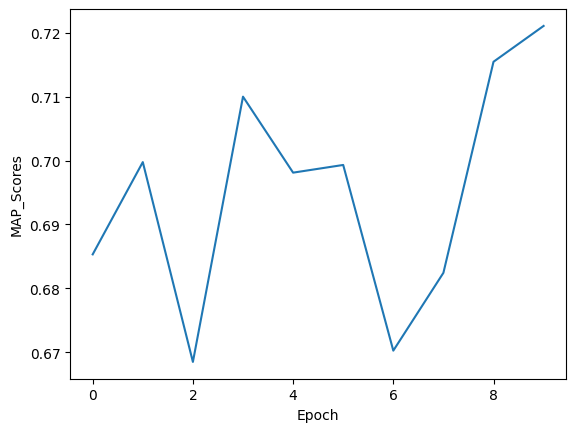

In [72]:
import matplotlib.pyplot as plt

plt.plot(map_scores)
plt.xlabel("Epoch")
plt.ylabel("MAP_Scores")
plt.show()

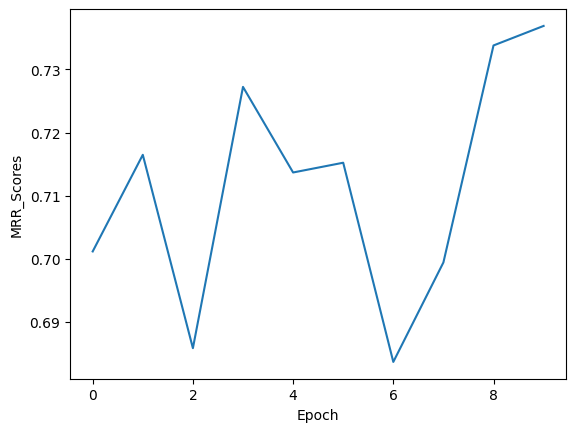

In [73]:
plt.plot(mrr_scores)
plt.xlabel("Epoch")
plt.ylabel("MRR_Scores")
plt.show()

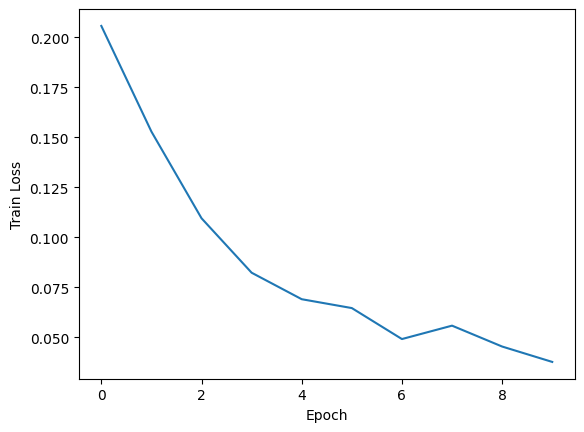

In [74]:
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.show()

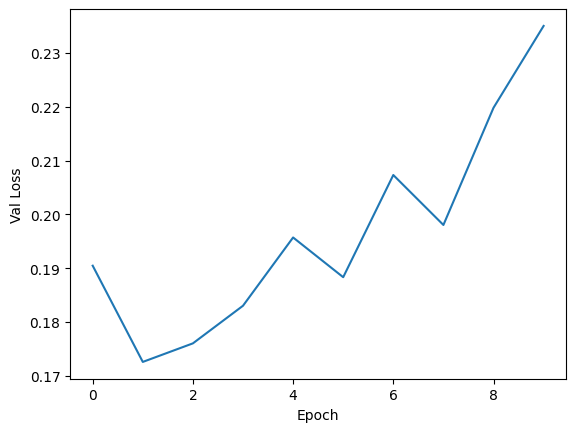

In [75]:
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.show()

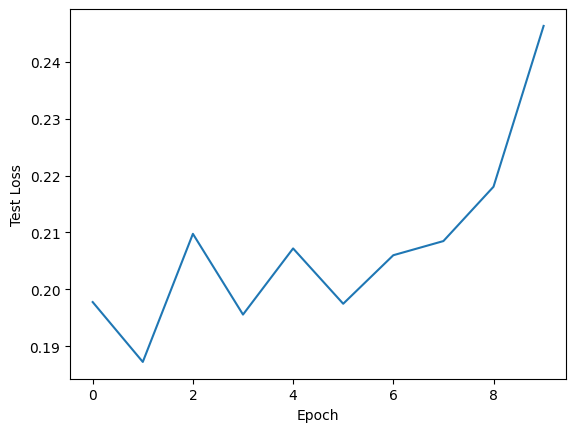

In [76]:
plt.plot(test_losses)
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.show()